<a href="https://colab.research.google.com/github/dcm22/bts-dsf-2020/blob/main/David_McMonagle_Session_5_6_EXERCISES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Session 5 & 6: Answers
### Student: David McMonagle

Open notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_5_6_EXERCISES.ipynb)

### Teacher: Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-11-12)

Open original notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_5_6_EXERCISES.ipynb)

# EXERCISE 1: image filtering

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg

## Loading Image

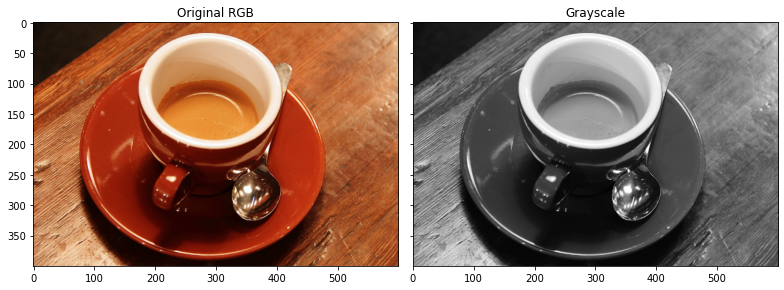

In [22]:
import numpy as np
import skimage
from skimage import data
from skimage.io import imshow
import matplotlib.pyplot as plt  
from skimage.io import imsave
from skimage.color import rgb2gray

coffee = data.coffee()
grayscale = rgb2gray(coffee)

# Plotting segmentation
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(11, 4))

ax[0].imshow(coffee)
ax[0].set_title('Original RGB')

ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title('Grayscale')

plt.tight_layout()
plt.show()

In [23]:
print(type(coffee))

print("\n", coffee.shape, coffee.dtype)
print("\n", grayscale.shape, grayscale.dtype)

<class 'numpy.ndarray'>

 (400, 600, 3) uint8

 (400, 600) float64


##Cropping image


(175, 210, 3)
(175, 210)


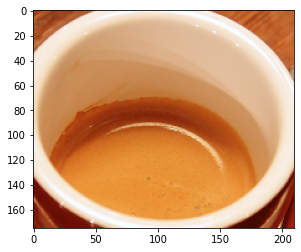

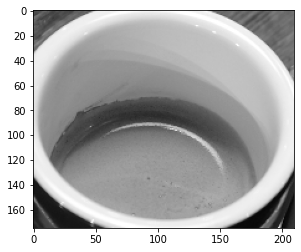

In [ ]:
c = coffee[25:200, 190:400]
g = grayscale[25:200, 190:400]
print(c.shape)
print(g.shape)

plt.imshow(c)
plt.show()

plt.imshow(g, cmap=plt.cm.gray)
plt.show()

## Smoothing image with kernel filter

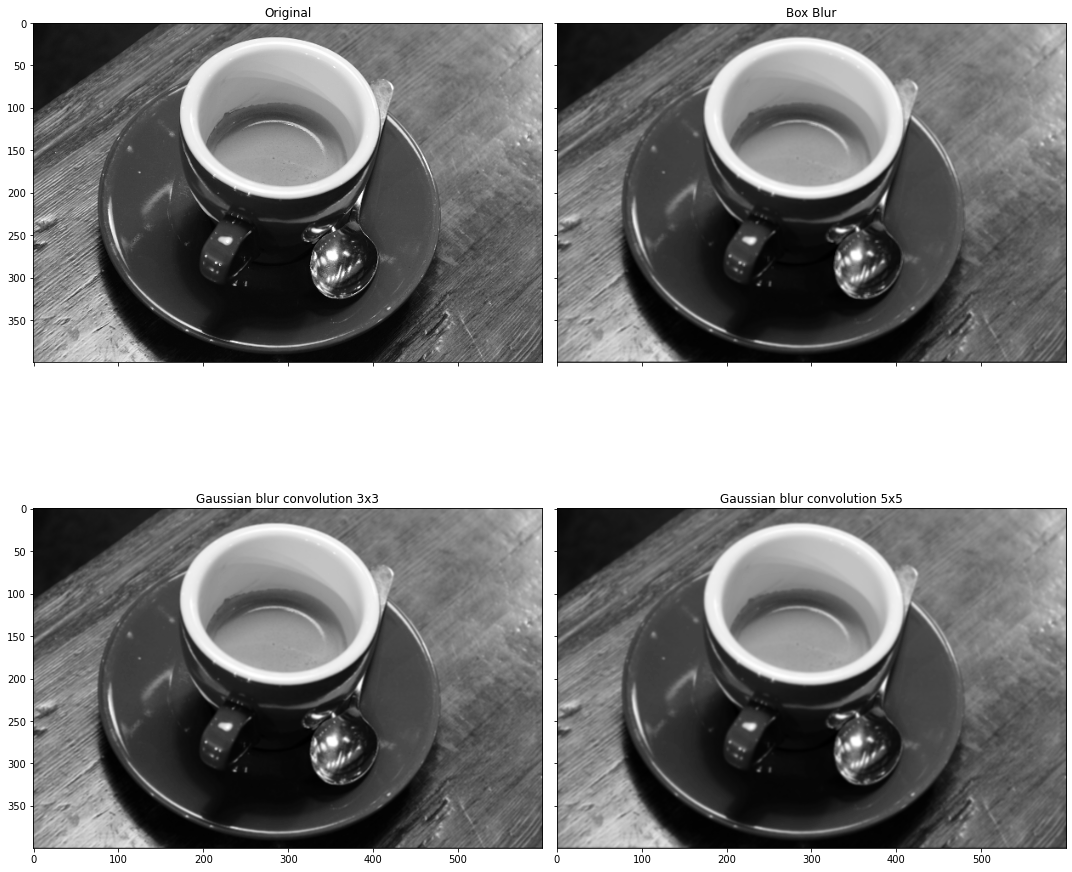

In [ ]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

box = np.array([ [1/9,1/9,1/9], 
                    [1/9,1/9,1/9], 
                    [1/9,1/9,1/9]]) 

kgb3 = np.array([ [1/16,2/16,1/16], 
                    [2/16,4/16,2/16], 
                    [1/16,2/16,1/16]]) 

kgb5 = np.array([ [1, 4, 6, 4, 1], 
                        [4, 16, 24, 16, 4], 
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]]) 

bblur = ndimage.convolve(grayscale, box, mode='constant', cval=0.0)

gblur3 = ndimage.convolve(grayscale, kgb3, mode='constant', cval=0.0)

gblur5 = ndimage.convolve(grayscale, kgb5, mode='constant', cval=0.0)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                       figsize=(15, 15))

ax[0,0].imshow(grayscale, cmap=plt.cm.gray)
ax[0,0].set_title('Original')

ax[0,1].imshow(bblur, cmap=plt.cm.gray)
ax[0,1].set_title('Box Blur')

ax[1,0].imshow(gblur3, cmap=plt.cm.gray)
ax[1,0].set_title('Gaussian blur convolution 3x3')

ax[1,1].imshow(gblur5, cmap=plt.cm.gray)
ax[1,1].set_title('Gaussian blur convolution 5x5')

plt.tight_layout()
plt.show()

## Sharpening image with kernel filter


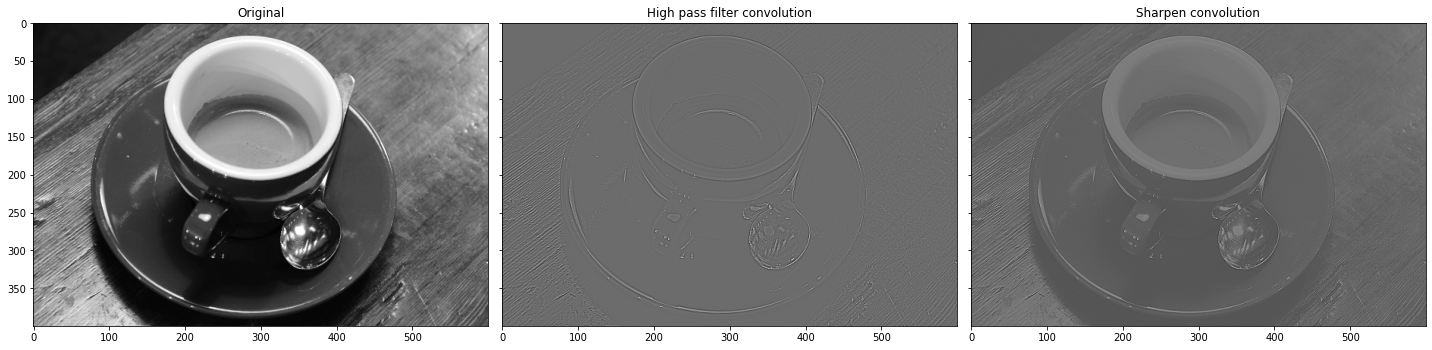

In [ ]:
khpf = np.array([ [-1, -1, -1], 
                    [-1, 8, -1], 
                    [-1, -1, -1]]) / 9

ksharp = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

hpf = ndimage.convolve(grayscale, khpf, mode='mirror', cval=0.0)

sharp = ndimage.convolve(grayscale, ksharp, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(grayscale, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(hpf, cmap=plt.cm.gray)
ax[1].set_title('High pass filter convolution')

ax[2].imshow(sharp, cmap=plt.cm.gray)
ax[2].set_title('Sharpen convolution')

plt.tight_layout()
plt.show()


## Finding the edges

### Method 1: Vertical filter


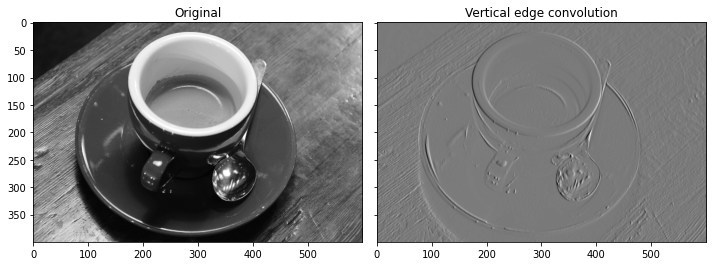

In [ ]:
kvert = np.array([ [-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]])


vert = ndimage.convolve(grayscale, kvert, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(grayscale, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(vert, cmap=plt.cm.gray)
ax[1].set_title('Vertical edge convolution')

plt.tight_layout()
plt.show()

### Method 2: Horizontal filter

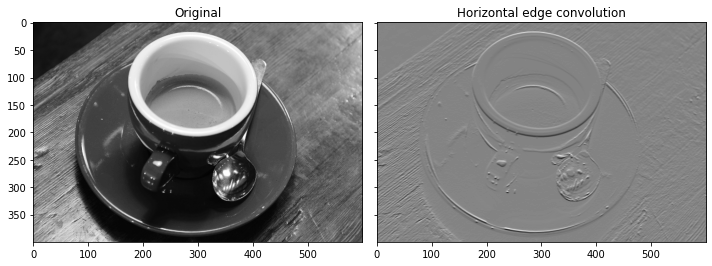

In [ ]:
khztl = np.array([ [1, 1, 1], 
                    [0, 0, 0], 
                    [-1, -1, -1]])


hztl = ndimage.convolve(grayscale, khztl, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(grayscale, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(hztl, cmap=plt.cm.gray)
ax[1].set_title('Horizontal edge convolution')

plt.tight_layout()
plt.show()

### Method 3: Edge detection V1

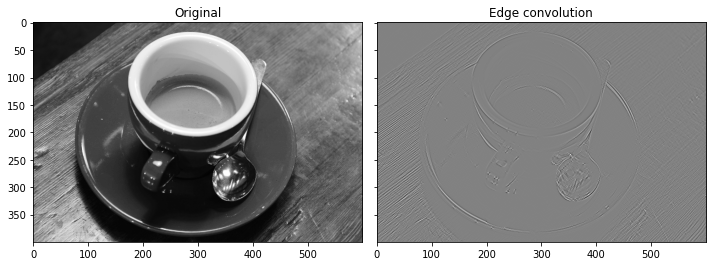

In [ ]:
kedge = np.array([ [1, 0, -1], 
                       [0, 0, 0], 
                        [-1, 0, 1]])

edge = ndimage.convolve(grayscale, kedge, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(grayscale, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(edge, cmap=plt.cm.gray)
ax[1].set_title('Edge convolution')

plt.tight_layout()
plt.show()

## Saving image as .jpeg

<function matplotlib.pyplot.show>

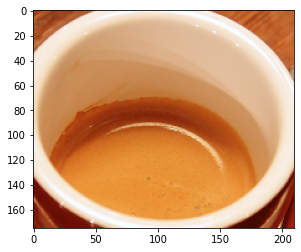

In [ ]:
from skimage import data
from skimage.io import imsave
import matplotlib.pyplot as plt

imsave("coffee_zoom.jpeg", c)

plt.imshow(c)
plt.show

# EXERCISE 2: semi-super resolution!

Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

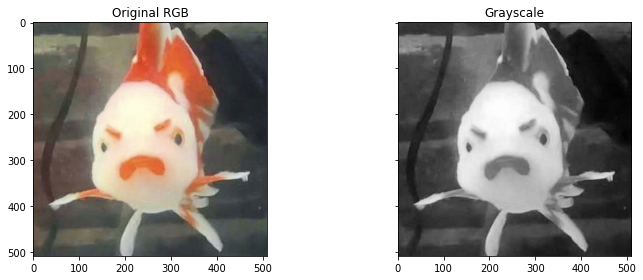

In [31]:
import numpy as np
import skimage
from skimage import data
from skimage.io import imshow
import matplotlib.pyplot as plt  
from skimage.io import imsave
from skimage.color import rgb2gray
import imageio


fish = imageio.imread('/content/fish.jpg')
fish_g = rgb2gray(fish)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(11, 4))

ax[0].imshow(fish)
ax[0].set_title('Original RGB')

ax[1].imshow(fish_g, cmap=plt.cm.gray)
ax[1].set_title('Grayscale')

plt.tight_layout()
plt.show()

In [32]:
print(type(fish))
print(type(fish_g))

print("\n", fish.shape, fish.dtype)
print("\n", fish_g.shape, fish_g.dtype)

<class 'imageio.core.util.Array'>
<class 'numpy.ndarray'>

 (509, 510, 3) uint8

 (509, 510) float64


[[  7  28  42  28   7]
 [ 28 112 168 112  28]
 [ 42 168 252 168  42]
 [ 28 112 168 112  28]
 [  7  28  42  28   7]]


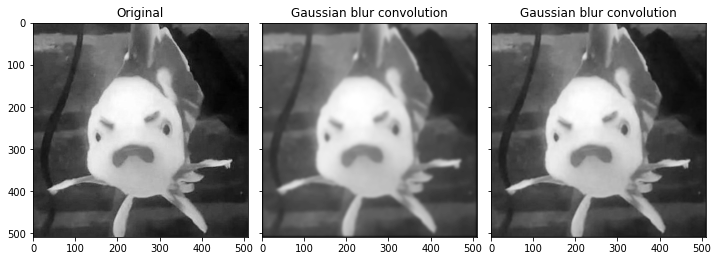

In [43]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

kernel = np.array([ [1, 4, 6, 4, 1], 
                        [4, 16, 24, 16, 4], 
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]]) 


kernel_ = 7*np.array([ [1, 4, 6, 4, 1], 
                        [4, 16, 24, 16, 4], 
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]]) 

print(kernel_)

filtered = ndimage.convolve(fish_g, kernel, mode='constant', cval=0.0)
filtered1 = ndimage.convolve(filtered, kernel, mode='constant', cval=0.0)
filtered2 = ndimage.convolve(filtered1, kernel, mode='constant', cval=0.0)
filtered3 = ndimage.convolve(filtered2, kernel, mode='constant', cval=0.0)
filtered4 = ndimage.convolve(filtered3, kernel, mode='constant', cval=0.0)
filtered5 = ndimage.convolve(filtered4, kernel, mode='constant', cval=0.0)
filtered6 = ndimage.convolve(filtered5, kernel, mode='constant', cval=0.0)

filtered7 = ndimage.convolve(fish_g, kernel_, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(fish_g, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered6, cmap=plt.cm.gray)
ax[1].set_title('Gaussian blur convolution')

ax[2].imshow(filtered7, cmap=plt.cm.gray)
ax[2].set_title('Gaussian blur convolution')

plt.tight_layout()
plt.show()

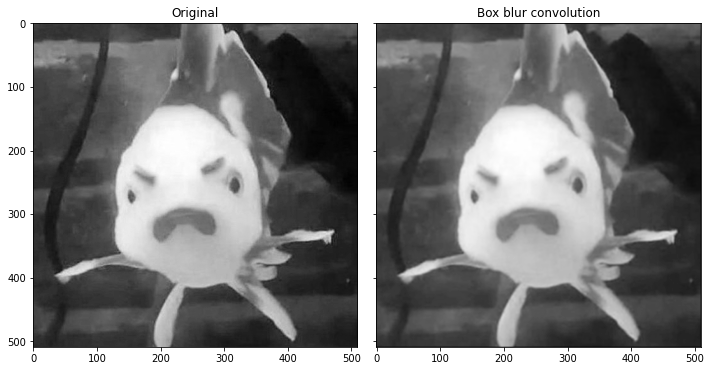

In [47]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

kernel = 10000*np.array([ [10,10,10], 
                    [10,1,10], 
                    [10,10,10]]) 

filtered_box = ndimage.convolve(fish_g, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(fish_g, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered_box, cmap=plt.cm.gray)
ax[1].set_title('Box blur convolution')

plt.tight_layout()
plt.show()

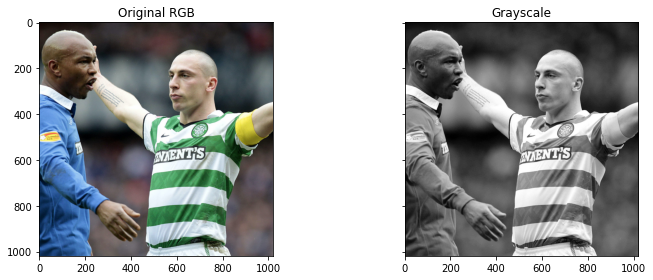

In [18]:
import numpy as np
import skimage
from skimage import data
from skimage.io import imshow
import matplotlib.pyplot as plt  
from skimage.io import imsave
from skimage.color import rgb2gray
import imageio


broony = imageio.imread('/content/Broony.jpg')
broony_g = rgb2gray(broony)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(11, 4))

ax[0].imshow(broony)
ax[0].set_title('Original RGB')

ax[1].imshow(broony_g, cmap=plt.cm.gray)
ax[1].set_title('Grayscale')

plt.tight_layout()
plt.show()

In [24]:
print(type(broony))
print(type(broony_g))

print("\n", broony.shape, broony.dtype)
print("\n", broony_g.shape, broony_g.dtype)

<class 'imageio.core.util.Array'>
<class 'numpy.ndarray'>

 (1019, 1019, 3) uint8

 (1019, 1019) float64


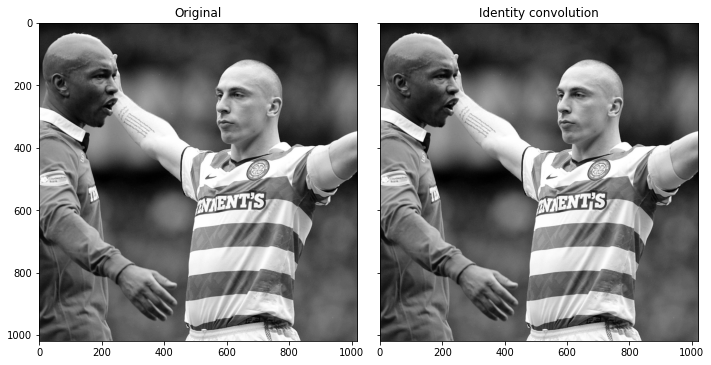

In [25]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

from skimage.data import camera

kernel = np.array([ [0,0,0], 
                    [0,1,0], 
                    [0,0,0]]) 

filtered = ndimage.convolve(broony_g, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(broony_g, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Identity convolution')

plt.tight_layout()
plt.show()

[[ 10000  40000  60000  40000  10000]
 [ 40000 160000 240000 160000  40000]
 [ 60000 240000 360000 240000  60000]
 [ 40000 160000 240000 160000  40000]
 [ 10000  40000  60000  40000  10000]]


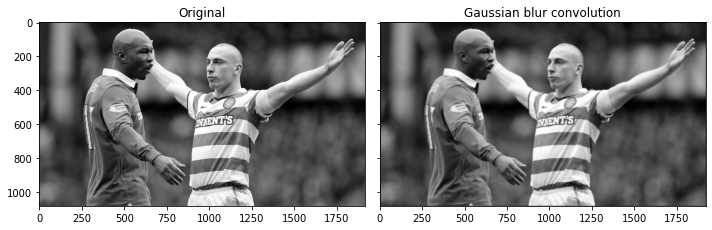

In [17]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

kernel = 10000*np.array([ [1, 4, 6, 4, 1], 
                        [4, 16, 24, 16, 4], 
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]]) 

print(kernel)

filtered = ndimage.convolve(broony_g, kernel, mode='constant', cval=0.0)
filtered1 = ndimage.convolve(filtered, kernel, mode='constant', cval=0.0)
filtered2 = ndimage.convolve(filtered1, kernel, mode='constant', cval=0.0)
filtered3 = ndimage.convolve(filtered2, kernel, mode='constant', cval=0.0)


fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(broony_g, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered3, cmap=plt.cm.gray)
ax[1].set_title('Gaussian blur convolution')

plt.tight_layout()
plt.show()

In [ ]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

from skimage.data import camera

kernel = 1/10000*np.array([ [1, 4, 6, 4, 1], 
                        [4, 16, 24, 16, 4], 
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]]) 

print(kernel)

filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Gaussian blur convolution')

plt.tight_layout()
plt.show()

[[-0.01 -0.01 -0.01]
 [-0.01  0.08 -0.01]
 [-0.01 -0.01 -0.01]]


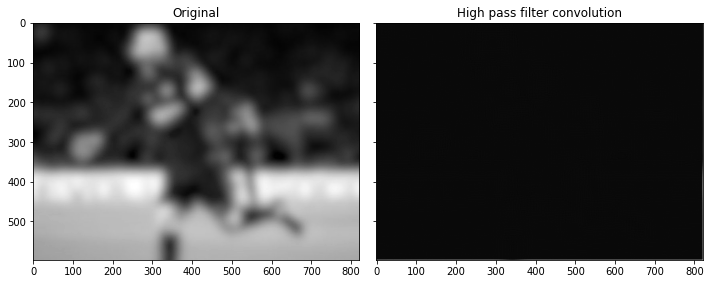

In [7]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

kernel = np.array([ [-1, -1, -1], 
                    [-1, 8, -1], 
                    [-1, -1, -1]]) / 100

print(kernel)

filtered = ndimage.convolve(bg_messi, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(bg_messi, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('High pass filter convolution')

plt.tight_layout()
plt.show()

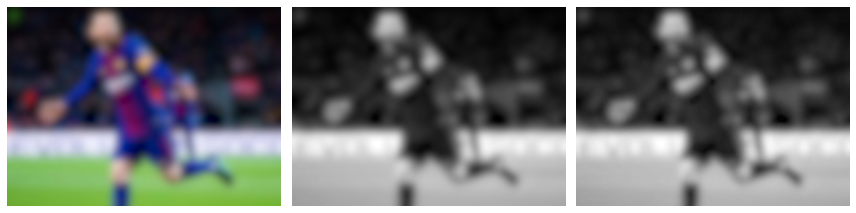

In [ ]:
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt

f_messi = ndimage.gaussian_filter(bg_messi, 3)

filter = ndimage.gaussian_filter(f_messi, 1)

alpha = 30
sharpened = f_messi + alpha * (f_messi - filter)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(b_messi, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(f_messi, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

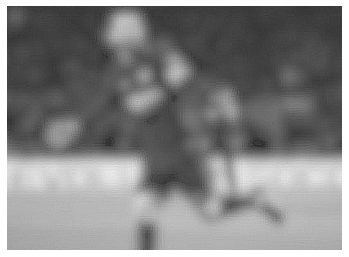

In [ ]:
# Then we create another filter of the blurred image using sigma 1
filter_blurred_f = ndimage.gaussian_filter(bg_messi, 1)

# We use an approximation of the Laplacian for increasing the weights of edges
alpha = 30
sharpened = bg_messi + alpha * (bg_messi - filter_blurred_f)

plt.figure(figsize=(6, 6))
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

Load the image with scikit image
Count the objects in the image using region based segmentation
Try to fix the image using opening/closing algorithms

## ANSWER


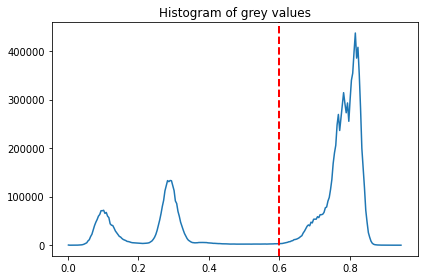

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


There are 4 cards.


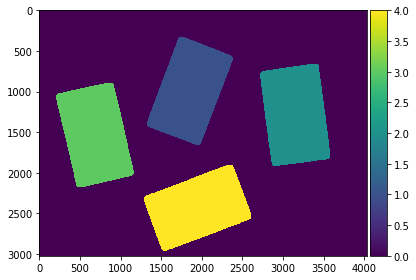

In [15]:
from skimage.color import rgb2gray
from skimage.exposure import histogram
from skimage.io import imshow , imread
from scipy import ndimage as ndi
import imageio
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt

# Loading the image
uno_ = imageio.imread('/content/uno.JPG')

# Converting to Gray
g_uno_ = rgb2gray(uno_)

# Rotating image
g_uno = ndimage.rotate(g_uno_, 90)

# Uping the contrast 
better_contrast = exposure.rescale_intensity(g_uno)

# Histogram of gray values to decide threshold for binary

hist, hist_centers = histogram(g_uno)

fig, ax = plt.subplots()

ax.plot(hist_centers, hist)
ax.axvline(0.6, color='r', ls='--', lw=2)
ax.set_title('Histogram of grey values')

plt.tight_layout()
plt.show()

# Converting to binary 
binary_uno_c = better_contrast < 0.6

# Opening: Erode then Dilate with square kernel
# Erosion
e_ed = ndimage.binary_erosion(binary_uno_c, structure=np.ones((50,50))).astype(binary_uno_c.dtype)

# Dilation
ed = ndimage.binary_dilation(e_ed, structure=np.ones((50,50))).astype(e_ed.dtype)

# Fill Holes
full_cards = ndi.binary_fill_holes(ed)

# Count Cards
labeled_cards, _ = ndi.label(full_cards)
imshow(labeled_cards)
print('There are ' + str(_) + ' cards.')



# Work to Acquire Answer

## Loading Image

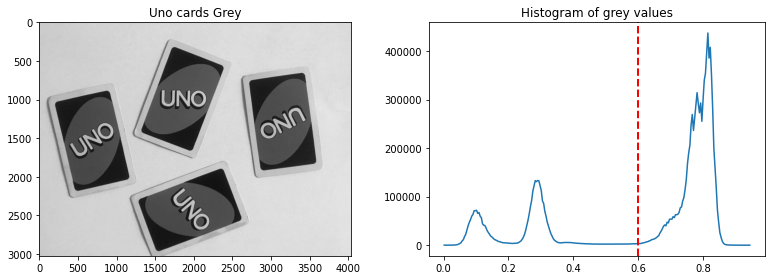

In [17]:
from skimage.color import rgb2gray
from skimage.exposure import histogram
from skimage.io import imshow , imread
from scipy import ndimage
import imageio
import matplotlib.pyplot as plt  
import numpy as np



uno_ = imageio.imread('/content/uno.JPG')
g_uno_ = rgb2gray(uno_)

uno = ndimage.rotate(uno_, 90)
g_uno = ndimage.rotate(g_uno_, 90)

hist, hist_centers = histogram(g_uno)

# Plotting segmentation
fig, ax = plt.subplots(ncols=2, sharex=False, sharey=False,
                       figsize=(11, 4))

ax[0].imshow(g_uno, cmap=plt.cm.gray)
ax[0].set_title('Uno cards Grey')

ax[1].plot(hist_centers, hist)
ax[1].axvline(0.6, color='r', ls='--', lw=2)
ax[1].set_title('Histogram of grey values')

plt.tight_layout()
plt.show()

## Creating Binary Image

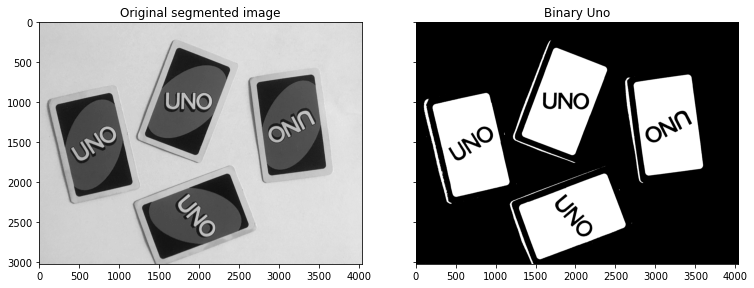

In [18]:
# Binary Image

binary_uno = g_uno < 0.6

# Plotting histogram

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(11, 4))

ax[0].imshow(g_uno, cmap=plt.cm.gray)
ax[0].set_title('Original segmented image')

ax[1].imshow(binary_uno, cmap=plt.cm.gray)
ax[1].set_title('Binary Uno')

plt.tight_layout()
plt.show()

## Upping Contrast

0.0 1.0


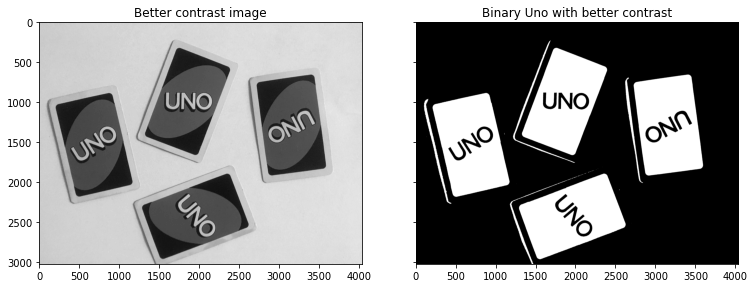

In [19]:
#Uping the contrast 

from skimage import exposure

better_contrast = exposure.rescale_intensity(g_uno)
print(better_contrast.min(), better_contrast.max())

binary_uno_c = better_contrast < 0.6

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(11, 4))

ax[0].imshow(better_contrast, cmap=plt.cm.gray)
ax[0].set_title('Better contrast image')

ax[1].imshow(binary_uno_c, cmap=plt.cm.gray)
ax[1].set_title('Binary Uno with better contrast')

plt.tight_layout()
plt.show()

##Filling the cards

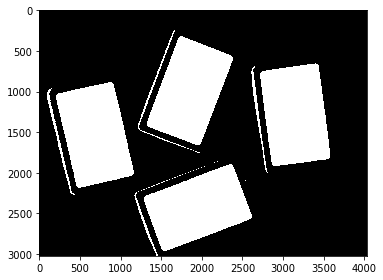

In [20]:
#Filling the cards

from scipy import ndimage as ndi

fill_cards = ndi.binary_fill_holes(binary_uno_c)
imshow(fill_cards)

##Opening and Closing


Text(0.5, 1.0, 'Closed image')

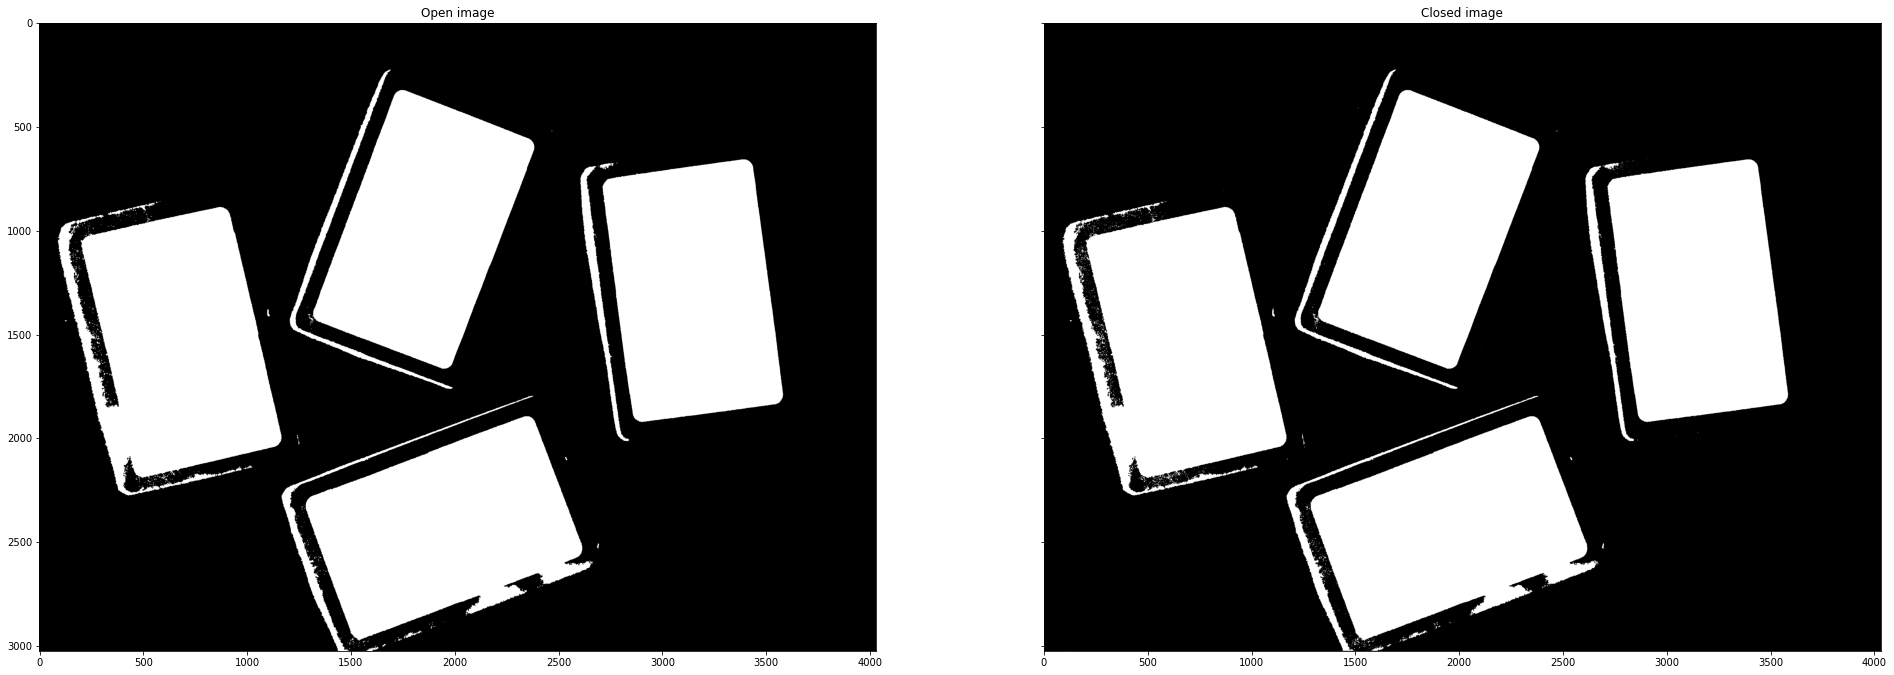

In [28]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

open_img = ndimage.binary_opening(fill_cards)
close_img = ndimage.binary_closing(fill_cards)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(33, 12))

ax[0].imshow(open_img, cmap=plt.cm.gray)
ax[0].set_title('Open image')

ax[1].imshow(close_img, cmap=plt.cm.gray)
ax[1].set_title('Closed image')


##Reopening Opened Image & Reclosing Closed Image

In [ ]:
open_img1 = ndimage.binary_opening(open_img)
close_img1 = ndimage.binary_closing(close_img)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(33, 12))

ax[0].imshow(open_img1, cmap=plt.cm.gray)
ax[0].set_title('Image after 2 openings')

ax[1].imshow(close_img1, cmap=plt.cm.gray)
ax[1].set_title('Image after 2 closings')


##Dilation

### 1st Dilation

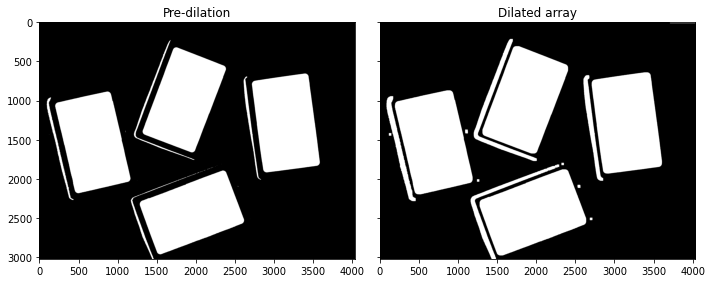

In [8]:
d = ndimage.binary_dilation(fill_cards, structure=np.ones((30,30))).astype(fill_cards.dtype)

# Plotting
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(fill_cards, cmap=plt.cm.gray)
ax[0].set_title('Pre-dilation')

ax[1].imshow(d, cmap=plt.cm.gray)
ax[1].set_title('Dilated array')

plt.tight_layout()
plt.show()

###2nd Dilation

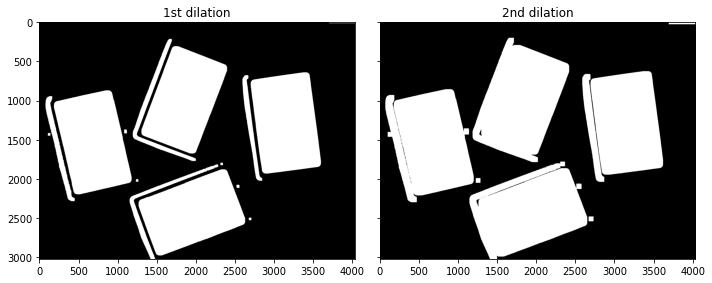

In [9]:
#Second Dilation
d1 = ndimage.binary_dilation(d, structure=np.ones((30,30))).astype(fill_cards.dtype)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(d, cmap=plt.cm.gray)
ax[0].set_title('1st dilation')

ax[1].imshow(d1, cmap=plt.cm.gray)
ax[1].set_title('2nd dilation')

plt.tight_layout()
plt.show()

##Erosion

### 1st Erosion

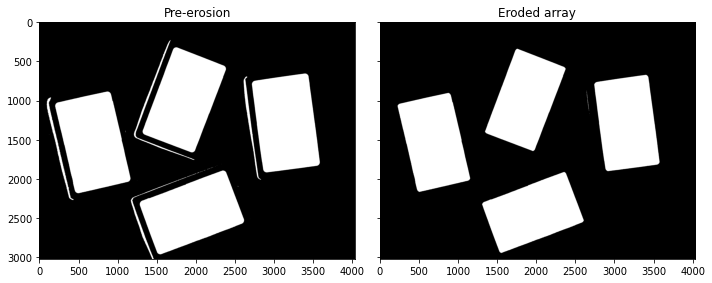

In [10]:
 # Erosion
e = ndimage.binary_erosion(fill_cards, structure=np.ones((30,30))).astype(fill_cards.dtype)

# Plotting
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(fill_cards, cmap=plt.cm.gray)
ax[0].set_title('Pre-erosion')

ax[1].imshow(e, cmap=plt.cm.gray)
ax[1].set_title('Eroded array')

plt.tight_layout()
plt.show()

###2nd Erosion

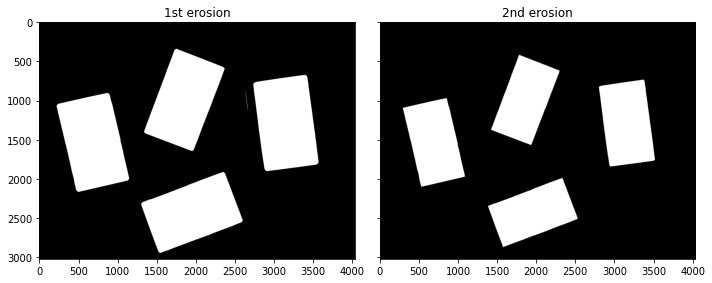

In [11]:
#Second Erosion
e1 = ndimage.binary_erosion(e, structure=np.ones((100,100))).astype(fill_cards.dtype)

# Plotting
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(e, cmap=plt.cm.gray)
ax[0].set_title('1st erosion')

ax[1].imshow(e1, cmap=plt.cm.gray)
ax[1].set_title('2nd erosion')

plt.tight_layout()
plt.show()

## Opening: Erode then Dilate (fill cards)

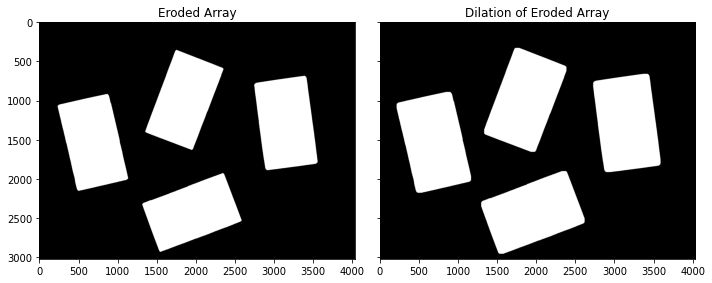

In [13]:
# Erosion
e_ed = ndimage.binary_erosion(fill_cards, structure=np.ones((50,50))).astype(fill_cards.dtype)

# Dilation
ed = ndimage.binary_dilation(e_ed1, structure=np.ones((50,50))).astype(fill_cards.dtype)

# Plotting
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(e_ed, cmap=plt.cm.gray)
ax[0].set_title('Eroded Array')

ax[1].imshow(ed, cmap=plt.cm.gray)
ax[1].set_title('Dilation of Eroded Array')

plt.tight_layout()
plt.show()


###Use binary_fill at the end

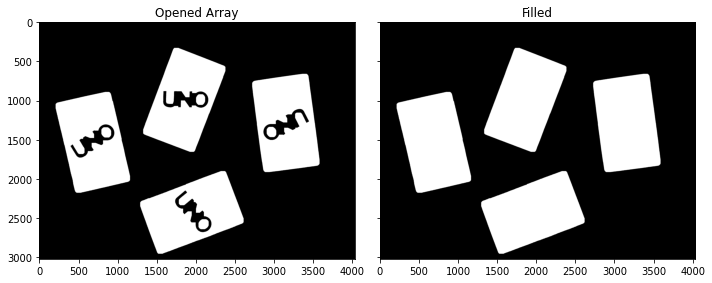

In [20]:
# Erosion
e_ed1 = ndimage.binary_erosion(binary_uno_c, structure=np.ones((50,50))).astype(fill_cards.dtype)

# Dilation
ed1 = ndimage.binary_dilation(e_ed, structure=np.ones((50,50))).astype(fill_cards.dtype)

# Fill Holes
fill_cards1 = ndi.binary_fill_holes(ed)

# Plotting
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(ed1, cmap=plt.cm.gray)
ax[0].set_title('Opened Array')

ax[1].imshow(fill_cards1, cmap=plt.cm.gray)
ax[1].set_title('Filled')

plt.tight_layout()
plt.show()


## Count the Cards

4


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


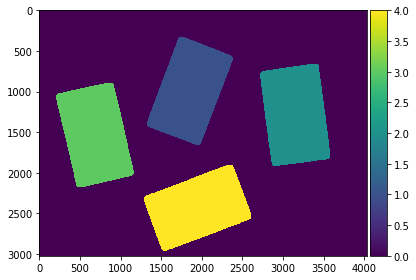

In [21]:
labeled_cards, _ = ndi.label(fill_cards1)
print(_)
imshow(labeled_cards)

# EXTRA

## Canny and Sobel filters

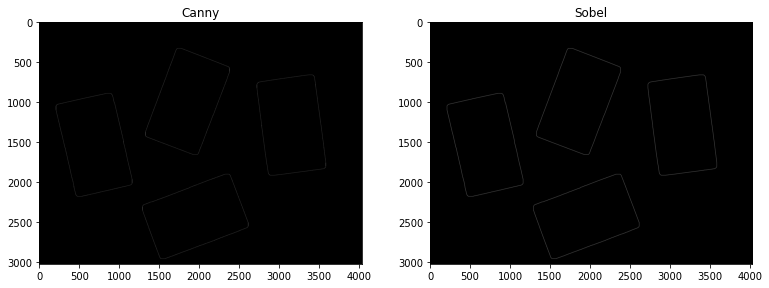

In [14]:
from skimage.feature import canny
from skimage.filters import sobel

canny_uno = canny(ed)

sobel_uno = sobel(ed)

# Plotting segmentation
fig, ax = plt.subplots(ncols=2, sharex=False, sharey=False,
                       figsize=(11, 4))

ax[0].imshow(canny_uno, cmap=plt.cm.gray)
ax[0].set_title('Canny')

ax[1].imshow(sobel_uno, cmap=plt.cm.gray)
ax[1].set_title('Sobel')

plt.tight_layout()
plt.show()

## Adaptive Equalization

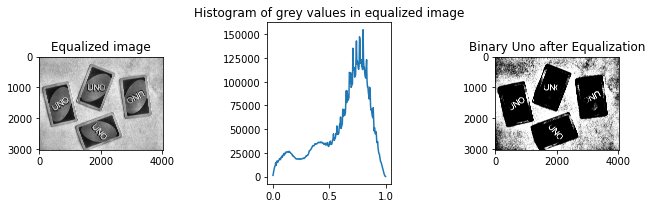

In [54]:
# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(g_uno, clip_limit=0.03)

hist, hist_centers = histogram(img_adapteq)

binary_uno = img_adapteq > 0.7

# Plotting segmentation
fig, ax = plt.subplots(ncols=3, sharex=False, sharey=False,
                       figsize=(9, 3))

ax[0].imshow(img_adapteq, cmap=plt.cm.gray)
ax[0].set_title('Equalized image')

ax[1].plot(hist_centers, hist)
ax[1].set_title('Histogram of grey values in equalized image')

ax[2].imshow(binary_uno, cmap=plt.cm.gray)
ax[2].set_title('Binary Uno after Equalization')


plt.tight_layout()
plt.show()


## Adaptive Contrast + Equlization

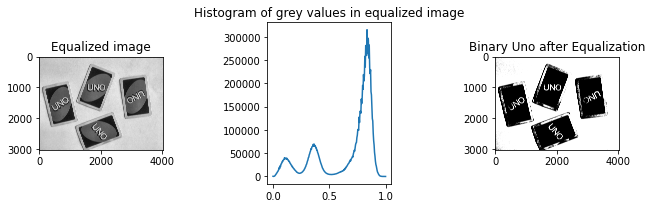

In [56]:
# Adaptive Contrast + Equalization 

img_adapteq = exposure.equalize_adapthist(better_contrast, clip_limit=0.01)

hist, hist_centers = histogram(img_adapteq)

binary_uno = img_adapteq > 0.7

# Plotting segmentation
fig, ax = plt.subplots(ncols=3, sharex=False, sharey=False,
                       figsize=(9, 3))

ax[0].imshow(img_adapteq, cmap=plt.cm.gray)
ax[0].set_title('Equalized image')

ax[1].plot(hist_centers, hist)
ax[1].set_title('Histogram of grey values in equalized image')

ax[2].imshow(binary_uno, cmap=plt.cm.gray)
ax[2].set_title('Binary Uno after Equalization')


plt.tight_layout()
plt.show()